# Dataset PreProcessing

In [20]:
import pandas as pd

## One-hot Encoding

In [21]:
def preprocess_df(df_path):

    df = pd.read_csv(df_path)
    df['Extracurricular Activities'] = df['Extracurricular Activities'].map({'Yes': 1, 'No': 0})
    df.to_csv("dataset/Student_Performance_preprocess.csv", index = False)

preprocess_df(df_path="dataset/Student_Performance.csv")

In [22]:
df = pd.read_csv('dataset/Student_Performance_preprocess.csv')
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,1,9,1,91.0
1,4,82,0,4,2,65.0
2,8,51,1,7,2,45.0
3,5,52,1,5,2,36.0
4,7,75,0,8,5,66.0


In [25]:
vas = df.columns.to_list()
print(vas)

['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']


## Z-score Normalization

In [23]:
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [26]:
def normalize_columns_zscore(dataframe, columns_to_standardize):
    standardized_df = dataframe.copy()
    
    # Initialize the StandardScaler
    scaler = StandardScaler()
    
    # Standardize the specified columns
    standardized_df[columns_to_standardize] = scaler.fit_transform(standardized_df[columns_to_standardize])
    standardized_df.to_csv("dataset/Student_Performance_preprocess_normalized_zscore.csv", index = False)
    return standardized_df

standardized_df = normalize_columns_zscore(df, ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced'])
standardized_df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.775188,1.704176,1,1.456205,-1.249754,91.0
1,-0.383481,0.723913,0,-1.492294,-0.900982,65.0
2,1.161410,-1.063626,1,0.276805,-0.900982,45.0
3,0.002742,-1.005963,1,-0.902594,-0.900982,36.0
4,0.775188,0.320275,0,0.866505,0.145333,66.0


## MinMax Normalization

In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

def normalize_columns_minmax(dataframe, columns_to_standardize):
    standardized_df = dataframe.copy()
    
    # Initialize the StandardScaler
    scaler = MinMaxScaler()
    
    # Standardize the specified columns
    standardized_df[columns_to_standardize] = scaler.fit_transform(standardized_df[columns_to_standardize])
    standardized_df.to_csv("dataset/Student_Performance_preprocess_normalized_minmax.csv", index = False)

    return standardized_df


standardized_df = normalize_columns_minmax(df, ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
)
standardized_df.head()


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,0.750,1.000000,1.0,1.0,0.111111,91.0
1,0.375,0.711864,0.0,0.0,0.222222,65.0
2,0.875,0.186441,1.0,0.6,0.222222,45.0
3,0.500,0.203390,1.0,0.2,0.222222,36.0
4,0.750,0.593220,0.0,0.8,0.555556,66.0


## Load Data

In [32]:
import pandas as pd
import numpy as np

def load_data(csv_file):
    data = pd.read_csv(csv_file)
    data_col_list = data.columns.to_list()
    x_col_list = data_col_list[:-1]
    print(f"Independent Values;\n{x_col_list}")

    y_col = data_col_list[-1]
    #Extract the independent variables (features) into matrix X
    X = data[x_col_list].values

    #Extract the dependent variable into vector Y
    Y = data[y_col].values
    print(f"dependent Values;\n{y_col}")
    return X, Y


csv_file = 'dataset/Student_Performance_preprocess_normalized_minmax.csv'
X, Y = load_data(csv_file)


Independent Values;
['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced']
dependent Values;
Performance Index


In [33]:
print(X)
print(f"{type(X)}, {X.shape}")
print("----")
print(Y)
print(f"{type(Y)}, {Y.shape}")


[[0.75       1.         1.         1.         0.11111111]
 [0.375      0.71186441 0.         0.         0.22222222]
 [0.875      0.18644068 1.         0.6        0.22222222]
 ...
 [0.625      0.72881356 1.         0.8        0.55555556]
 [1.         0.96610169 1.         0.6        0.        ]
 [0.75       0.57627119 0.         0.8        0.11111111]]
<class 'numpy.ndarray'>, (10000, 5)
----
[91. 65. 45. ... 74. 95. 64.]
<class 'numpy.ndarray'>, (10000,)


# Dataset Splitting

In [4]:
from sklearn.model_selection import train_test_split

def split_data(X, Y, test_size=0.3, random_state=None):
    """
    Split the data into training and test sets.

    Args:
    X (numpy.ndarray): The independent variables (features).
    Y (numpy.ndarray): The dependent variable.
    test_size (float): The proportion of data to include in the test split (default is 0.3).
    random_state (int or None): Seed for random number generation (optional).

    Returns:
    X_train (numpy.ndarray): Training data for independent variables.
    X_test (numpy.ndarray): Test data for independent variables.
    Y_train (numpy.ndarray): Training data for the dependent variable.
    Y_test (numpy.ndarray): Test data for the dependent variable.
    """
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=random_state)
    return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = split_data(X, Y, test_size=0.3, random_state=42)


In [34]:
print(X_test)
print(f'lenght of array {len(X_test)}')
print(type(X_test))
print("----")

print(X_train)
print(f'lenght of array {len(X_train)}')
print(type(X_train))
print("----")

print(Y_test)
print(f'lenght of array {len(Y_test)}')
print(type(Y_test))
print("----")

print(Y_train)
print(f'lenght of array {len(Y_train)}')
print(type(Y_train))
print("----")

[[0.5        0.49152542 0.         0.8        0.22222222]
 [0.125      0.10169492 1.         0.         0.88888889]
 [0.75       0.27118644 1.         0.6        0.55555556]
 ...
 [0.5        0.13559322 1.         0.4        0.44444444]
 [0.25       0.77966102 1.         1.         0.55555556]
 [0.625      0.05084746 1.         0.4        0.44444444]]
lenght of array 3000
<class 'numpy.ndarray'>
----
[[0.375      1.         1.         0.4        0.11111111]
 [0.625      0.84745763 1.         1.         0.33333333]
 [0.875      0.28813559 0.         0.4        0.11111111]
 ...
 [1.         0.13559322 0.         0.6        0.66666667]
 [0.         0.11864407 0.         1.         0.        ]
 [0.125      0.10169492 0.         0.4        0.66666667]]
lenght of array 7000
<class 'numpy.ndarray'>
----
[51. 20. 46. ... 33. 69. 29.]
lenght of array 3000
<class 'numpy.ndarray'>
----
[82. 79. 50. ... 44. 20. 24.]
lenght of array 7000
<class 'numpy.ndarray'>
----


# Helper Functions

### Prediction Function

In [7]:
def H_function(X, weights, bias):
    """
    Compute the estimated prices for all examples in the training set.

    Args:
    X (numpy.ndarray): Training data for independent variables.
    weights (numpy.ndarray): Model coefficients (weights).
    bias (float): Model bias term.

    Returns:
    estimated_prices (numpy.ndarray): Estimated prices for all examples in the training set.
    """
    estimated_prices = np.dot(X, weights) + bias
    return estimated_prices

# Usage:
# Assuming you have already trained your linear regression model and obtained the weights and bias.
# estimated_prices_train = H_function(X_train, updated_weights, updated_bias)


### Cost Function

In [6]:
def Cost_function(X, Y, weights, bias):
    """
    Compute the mean squared error (MSE) cost for a given hypothesis (model).

    Args:
    X (numpy.ndarray): Training data for independent variables.
    Y (numpy.ndarray): Actual values (dependent variable).
    weights (numpy.ndarray): Model coefficients (weights).
    bias (float): Model bias term.

    Returns:
    cost (float): Mean squared error cost.
    """
    # Compute the predicted values using the hypothesis function
    predicted_values = H_function(X, weights, bias)
    
    # Calculate the squared differences between predicted and actual values
    squared_errors = (predicted_values - Y) ** 2
    
    # Calculate the mean squared error
    cost = np.mean(squared_errors)
    
    return cost

# Usage:
# Assuming you have already trained your linear regression model and obtained the weights and bias.
# cost_train = Cost_function(X_train, Y_train, weights, bias)


### Plot Function

In [35]:
import matplotlib.pyplot as plt
import datetime


def Plot_data(train_costs, test_costs):
    """
    Plot the cost (MSE) for both the train and test sets after each epoch.

    Args:
    train_costs (list): List of training cost values for each epoch.
    test_costs (list): List of test cost values for each epoch.
    """
    epochs = range(1, len(train_costs) + 1)
    current_datetime = datetime.datetime.now()
    formatted_datetime = current_datetime.strftime("%Y-%m-%d %H:%M:%S")


    plt.figure(figsize=(10, 6), facecolor='white')
    
    plt.plot(epochs, train_costs, label='Train Cost', marker='o', linestyle='-')
    plt.plot(epochs, test_costs, label='Test Cost', marker='x', linestyle='-')
    plt.xlabel('Number of Epochs')
    plt.ylabel('Cost (MSE)')
    plt.title('Cost vs. Number of Epochs')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"{formatted_datetime}_plt.png")
    plt.show()

### Gradient Descent

In [36]:
def Gradient_descent(X_train, Y_train, X_test, Y_test, weights, bias, learning_rate, num_epochs):
    """
    Perform gradient descent to update the model parameters (weights and bias).

    Args:
    X (numpy.ndarray): Training data for independent variables.
    Y (numpy.ndarray): Actual values (dependent variable).
    weights (numpy.ndarray): Model coefficients (weights).
    bias (float): Model bias term.
    learning_rate (float): Learning rate for gradient descent.
    num_epochs (int): Number of epochs for training.

    Returns:
    weights (numpy.ndarray): Updated model coefficients (weights).
    bias (float): Updated model bias term.
    cost_history (list): List of cost values for each epoch.
    """
    train_cost_history = []
    test_cost_history = []


    # Optional: Normalize the data
    X_mean = np.mean(X_train, axis=0)
    X_std = np.std(X_train, axis=0)
    X_normalized = (X_train - X_mean) / X_std

    for epoch in range(num_epochs):
        # Compute the predicted values using the current model
        predicted_values = H_function(X_normalized, weights, bias)
        
        # Compute the gradients of the weights and bias
        gradient_weights = (1 / len(Y_train)) * np.dot(X_normalized.T, (predicted_values - Y_train))
        gradient_bias = (1 / len(Y_train)) * np.sum(predicted_values - Y_train)
        
        # Update the weights and bias using the gradients and learning rate
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias
        
        # Calculate the cost and append it to the cost history
        train_cost = Cost_function(X_normalized, Y_train, weights, bias)
        # cost_history.append(cost)
        train_cost_history.append(train_cost)
        
        test_cost = Cost_function(X_test, Y_test, weights, bias)
        test_cost_history.append(test_cost)
        
        # Print the cost for every 100 epochs (optional)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Train_Cost = {train_cost}  //  Test_Cost = {test_cost}")

    return weights, bias, train_cost_history, test_cost_history




# Training

### HyperParameters

In [37]:
# Best HyperParams


learning_rate = 0.001  # Adjust as needed
num_epochs = 2000

# Initialize random weights
# initial_weights = np.random.rand(X_train.shape[1])

# Generate random weights between 1 and 1.1
# initial_weights = 1 + 0.1 * np.random.rand(X_train.shape[1])

# Define the range for weight initialization
min_value = 0.9
max_value = 1.0

# Generate random weights within the specified range
initial_weights = min_value + (max_value - min_value) * np.random.rand(X_train.shape[1])

# Set initial bias
initial_bias = 0


### Train

In [ ]:
updated_weights, updated_bias, train_cost_history, test_cost_history = Gradient_descent(X_train, Y_train, X_test, Y_test, initial_weights, initial_bias, learning_rate, num_epochs)


# Predict

### Input Array

In [10]:
input = np.array([0.500,    0.203390,	1.0,	0.2,	0.22222])



### Predict

In [39]:
prediction = H_function(X= input,
                         weights= updated_weights,
                         bias= updated_bias)

In [40]:
print(prediction)

55.022494398342495


# Plot Cost History

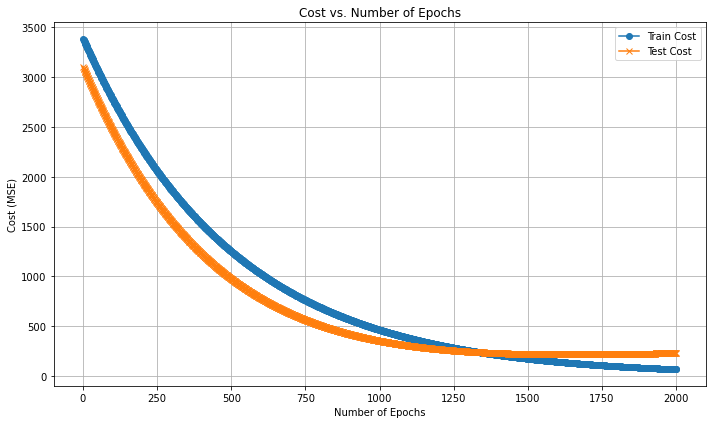

In [41]:
# Assuming you have lists of training and test costs obtained during training
Plot_data(train_cost_history, test_cost_history)


# Save Model

### Local Save -Update file path before running

In [42]:
import pickle


# Create a dictionary to store the model parameters
model_parameters = {
    'weights': updated_weights,
    'bias': updated_bias
}

# Specify the file path where you want to save the model parameters
file_path = 'models/Performance_regression.pkl'

# Save the model parameters to a .pkl file
with open(file_path, 'wb') as file:
    pickle.dump(model_parameters, file)


### Huggingface cloud

In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [4]:
from huggingface_hub import HfApi
api = HfApi()
api.upload_file(
    path_or_fileobj="models/Performance_regression.pkl",
    path_in_repo="Performace_regression.pkl",
    repo_id="sharoz/Performance_regression",
    repo_type="model",
)

Upload 1 LFS files: 100%|██████████| 1/1 [00:03<00:00,  3.75s/it]


'https://huggingface.co/sharoz/Performance_regression/blob/main/Performace_regression.pkl'

# Load Saved Model

In [45]:
import pickle

# Specify the file path where the model parameters are saved
file_path = 'models/Performance_regression.pkl'

# Load the model parameters from the .pkl file
with open(file_path, 'rb') as file:
    loaded_model_parameters = pickle.load(file)

# Access the loaded weights and bias for inference
loaded_weights = loaded_model_parameters['weights']
loaded_bias = loaded_model_parameters['bias']

# Perform inference using the loaded model parameters
input_data = np.array([0.500,    0.203390,	1.0,	0.2,	0.22222])
predictions = H_function(input_data, loaded_weights, loaded_bias)

# Display the predictions
print("Input Data:", input_data)
print("Predictions:", predictions)


Input Data: [0.5     0.20339 1.      0.2     0.22222]
Predictions: 55.022494398342495


# Logistic Regression

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [71]:
data = pd.read_csv('dataset/Heart_Disease.csv')
# data = pd.read_csv("dataset/Student_Performance_preprocess_normalized_minmax.csv")

In [ ]:
data.columns.to_list()

In [ ]:
import pandas as pd
import numpy as np

# Replace None values with NaN
df = data.fillna(np.nan)

# Count NaN values in each column
nan_counts = df.isna().sum()

# Print the count of NaN values in each column
print(nan_counts)


In [75]:
#Replace NaN value
df.fillna(0, inplace=True)


In [86]:
# Step 3: Split the dataset into training and test sets
X = df.drop('TenYearCHD', axis=1)  # Assuming 'dependent_variable' is the target variable
Y = df['TenYearCHD']

X_train, X_test, Y_train, Y_test = split_data(X, Y, test_size=0.3, random_state=42)

In [ ]:
import numpy as np



def sigmoid(z):
    """
    Compute the sigmoid function.

    Args:
    z (numpy.ndarray): Input values.

    Returns:
    sigmoid_values (numpy.ndarray): Sigmoid values.
    """
    sigmoid_values = 1 / (1 + np.exp(-z))
    return sigmoid_values

In [ ]:

def H_function(X, weights, bias):
    """
    Compute the estimated probabilities for all examples in the dataset using logistic regression.

    Args:
    X (numpy.ndarray): Input data.
    weights (numpy.ndarray): Model coefficients (weights).
    bias (float): Model bias term.

    Returns:
    estimated_probabilities (numpy.ndarray): Estimated probabilities.
    """
    linear_combination = np.dot(X, weights) + bias
    estimated_probabilities = sigmoid(linear_combination)
    return estimated_probabilities

In [ ]:
def Cost_function_cec(X, Y, weights, bias):
    """
    Compute the cross-entropy cost for logistic regression.

    Args:
    X (numpy.ndarray): Input data.
    Y (numpy.ndarray): Actual labels (0 or 1).
    weights (numpy.ndarray): Model coefficients (weights).
    bias (float): Model bias term.

    Returns:
    cost (float): Cross-entropy cost.
    """
    estimated_probabilities = H_function(X, weights, bias)
    m = len(Y)
    epsilon = 1e-15  # Small epsilon value to prevent log(0) issues

    # Calculate the cross-entropy cost
    cost = (-1 / m) * np.sum(Y * np.log(estimated_probabilities + epsilon) + (1 - Y) * np.log(1 - estimated_probabilities + epsilon))
    return cost

In [110]:
def Gradient_descent(X_train, Y_train, X_test, Y_test, weights, bias, learning_rate, num_epochs):
    train_cost_history = []
    test_cost_history = []

    # Optional: Normalize the data
    X_mean = np.mean(X_train, axis=0)
    X_std = np.std(X_train, axis=0)
    X_normalized_train = (X_train - X_mean) / X_std
    X_normalized_test = (X_test - X_mean) / X_std

    for epoch in range(num_epochs):
        # Compute the predicted probabilities using the current model
        train_probabilities = H_function(X_normalized_train, weights, bias)
        # test_probabilities = H_function(X_normalized_test, weights, bias)

        # Compute the gradients of the weights and bias with sigmoid
        gradient_weights = (1 / len(Y_train)) * np.dot(X_normalized_train.T, (train_probabilities - Y_train))
        gradient_bias = (1 / len(Y_train)) * np.sum(train_probabilities - Y_train)

        # Update the weights and bias using the gradients and learning rate
        weights -= learning_rate * gradient_weights
        bias -= learning_rate * gradient_bias

        # Calculate the cost for training and test sets and append them to the respective cost histories
        train_cost = Cost_function_cec(X_normalized_train, Y_train, weights, bias)
        train_cost_history.append(train_cost)

        test_cost = Cost_function_cec(X_normalized_test, Y_test, weights, bias)
        test_cost_history.append(test_cost)

        # Print the cost for every 100 epochs (optional)
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Train_Cost = {train_cost}  //  Test_Cost = {test_cost}")

    return weights, bias, train_cost_history, test_cost_history





In [111]:
#Best HyperParameters


learning_rate = 0.01  # Adjust as needed
num_epochs = 2000

# Initialize random weights
initial_weights = np.random.rand(X_train.shape[1])

# Generate random weights between 1 and 1.1
# initial_weights = 1 + 0.1 * np.random.rand(X_train.shape[1])

# Define the range for weight initialization
min_value = 0.9
max_value = 1.0

# # Generate random weights within the specified range
initial_weights = min_value + (max_value - min_value) * np.random.rand(X_train.shape[1])

# Set initial bias
initial_bias = 0

Epoch 0: Train_Cost = 1.644475895311175  //  Test_Cost = 1.5758699798535951


Epoch 100: Train_Cost = 1.3761800172714675  //  Test_Cost = 1.31997920677817
Epoch 200: Train_Cost = 1.1431781728069763  //  Test_Cost = 1.0973011517034748
Epoch 300: Train_Cost = 0.9500436967421728  //  Test_Cost = 0.9122245666448192
Epoch 400: Train_Cost = 0.7979611893493035  //  Test_Cost = 0.7660494578791159
Epoch 500: Train_Cost = 0.6838312399592716  //  Test_Cost = 0.6560191468590589
Epoch 600: Train_Cost = 0.6010644383632195  //  Test_Cost = 0.5760818997657907
Epoch 700: Train_Cost = 0.5419259489107796  //  Test_Cost = 0.5190702088105968
Epoch 800: Train_Cost = 0.4997264012298551  //  Test_Cost = 0.4786279131776873
Epoch 900: Train_Cost = 0.4695503672388254  //  Test_Cost = 0.44996868549773555
Epoch 1000: Train_Cost = 0.44794596327099884  //  Test_Cost = 0.4297061290168145
Epoch 1100: Train_Cost = 0.4324173947496782  //  Test_Cost = 0.41541334792778173
Epoch 1200: Train_Cost = 0.4211127703790964  //  Test_Cost = 0.4053047129140918
Epoch 1300: Train_Cost = 0.41268792703398893  //

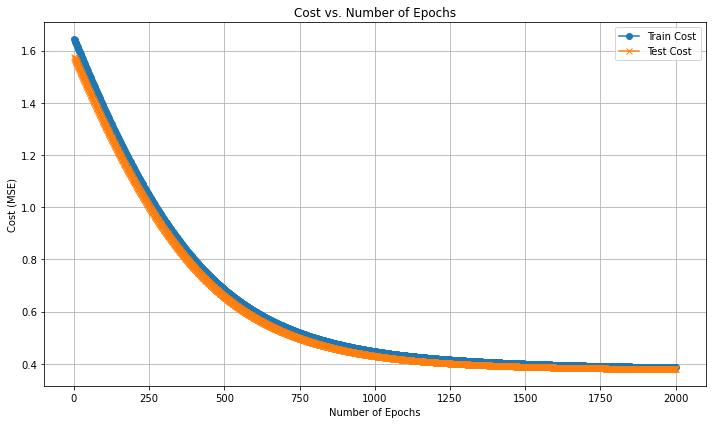

In [112]:
updated_weights, updated_bias, train_cost_history, test_cost_history = Gradient_descent(X_train, Y_train, X_test, Y_test, initial_weights, initial_bias, learning_rate, num_epochs)

Plot_data(train_cost_history, test_cost_history)


In [113]:
import pickle


# Create a dictionary to store the model parameters
model_parameters = {
    'weights': updated_weights,
    'bias': updated_bias
}

# Specify the file path where you want to save the model parameters
file_path = 'models/Heart_Disease_logistic_regression.pkl'

# Save the model parameters to a .pkl file
with open(file_path, 'wb') as file:
    pickle.dump(model_parameters, file)


In [114]:
from huggingface_hub import HfApi
api = HfApi()
api.upload_file(
    path_or_fileobj="models/Heart_Disease_logistic_regression.pkl",
    path_in_repo="model.pkl",
    repo_id="sharoz/Heart_Disease_logistic_regression",
    repo_type="model",
)

Heart_Disease_logistic_regression.pkl:   0%|          | 0.00/318 [00:00<?, ?B/s]

Upload 1 LFS files:   0%|          | 0/1 [00:00<?, ?it/s]

'https://huggingface.co/sharoz/Heart_Disease_logistic_regression/blob/main/model.pkl'